### simple test for GPM rainfall classification
- to make an alternative way to differentiate unexplained GPM rainfall into deep convection based on the BT value used in PyFLEXTRKR (< 241K)

In [1]:
import os
import sys
import xarray as xr
import numpy as np

In [11]:
data_gpm = xr.open_dataset('/neelin2020/RGMA_feature_mask/GPM_ncfiles_2017/GPM_IMERGE_V06_20170101_0000.nc')
data_BT = xr.open_dataset('/neelin2020/RGMA_feature_mask/merg_2017010100_4km-pixel.nc4')

In [8]:
lon_era5 = np.arange(-180,180,0.25)
lat_era5 = np.arange(-60,60,0.25)

In [17]:
# selecting -60 to 60 for lat
data_gpm_sub = data_gpm.sel(lat=slice(-60,60))
data_BT_sub = data_BT.sel(lat=slice(-60,60))

In [28]:
data_gpm_re = data_gpm_sub.precipitationCal.interp(lon=lon_era5, lat=lat_era5)
data_BT_re = data_BT_sub.Tb.isel(time=0).interp(lon=lon_era5, lat=lat_era5)

In [24]:
data_gpm_re = data_gpm_re.where(data_gpm_re>0, np.nan)
data_gpm_re = data_gpm_re.fillna(0)

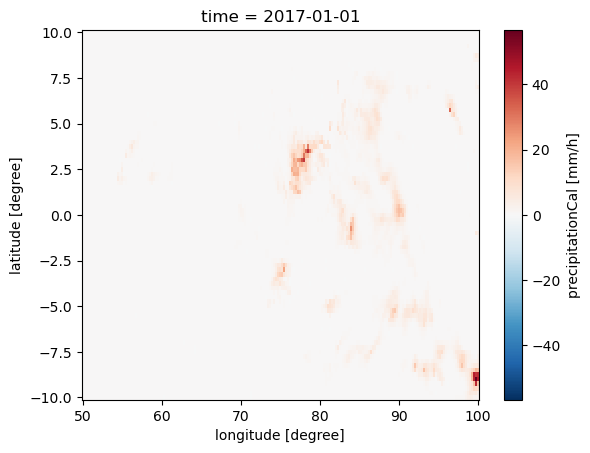

In [30]:
(data_gpm_re.sel(lat=slice(-10,10), lon=slice(50,100)).T).plot()

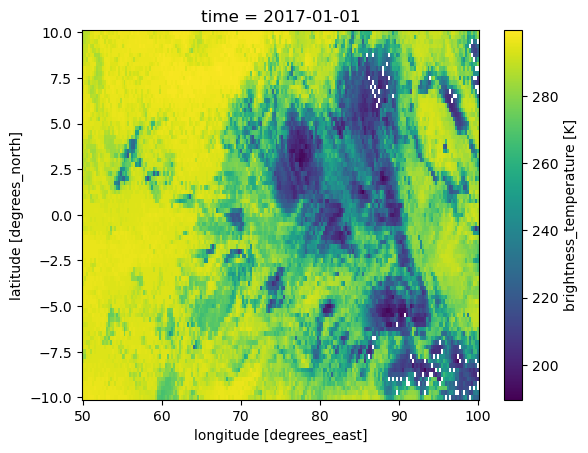

In [32]:
data_BT_re.sel(lat=slice(-10,10), lon=slice(50,100)).plot()